In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [3]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from main import get_args
from rxnscribe.dataset import ReactionDataset
from rxnscribe.tokenizer import get_tokenizer
import torchvision.transforms.functional as F

args = get_args(notebook=True)
args.format = 'bbox'
args.pix2seq = True
args.data_path = '../data/parse'
args.image_path = '../data/parse/images'
args.train_file = 'test.json'
args.num_train_example = None
args.augment = True
args.composite_augment = True
args.rand_order = True

tokenizer = get_tokenizer(args)
train_dataset = ReactionDataset(args, tokenizer, args.train_file, split='train', debug=True)

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 6], [5, 8], [0, 7], [3, 10], [14, 9]]
[[0.0, 0.0, 436.29998779296875, 250.0], [125.80000305175781, 400.0, 358.4000244140625, 536.7999877929688], [222.0, 240.0, 262.0, 281.0], [518.9000244140625, 157.0, 786.0, 257.0], [526.9400024414062, 297.82000732421875, 575.8099975585938, 345.1700134277344], [541.2000122070312, 302.0, 867.0, 583.5999755859375], [818.7999877929688, 40.0, 1312.9000244140625, 510.8999938964844], [1321.0, 174.0, 1493.0, 267.0], [1506.300048828125, 74.19999694824219, 2004.0, 515.0], [2034.0, 205.0, 2303.0, 260.0], [2083.0, 286.0, 2215.0, 343.0], [2356.050048828125, 240.0, 2392.0, 298.0], [212.0, 560.0, 253.0, 608.0], [692.0, 577.0, 738.0, 613.0], [1068.0, 515.0, 1118.0, 565.0], [1739.0, 522.0, 1794.0, 577.0]]
[1, 1, 3, 2, 2, 1, 1, 2, 1, 2, 2, 3, 3, 3, 3, 3]
0.0 0.0
125.80000305175781 400.0
222.0 240.0
518.900024414

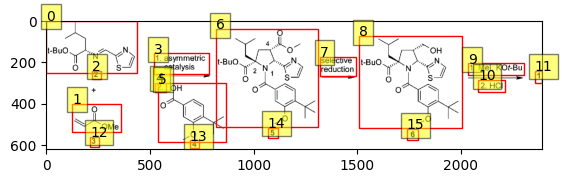

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 8], [1, 9], [13, 10], [0, 3], [12, 5]]
[[21.209999084472656, 138.17999267578125, 222.97000122070312, 175.489990234375], [24.920000076293945, 325.8599853515625, 220.17999267578125, 362.239990234375], [49.08000183105469, 197.64999389648438, 194.16000366210938, 318.57000732421875], [49.08000183105469, 4.389999866485596, 194.16000366210938, 126.25], [61.15999984741211, 386.260009765625, 184.8699951171875, 506.25], [264.6400146484375, 384.3999938964844, 428.3000183105469, 421.6999816894531], [299.94000244140625, 197.64999389648438, 440.3800048828125, 328.78997802734375], [325.0299987792969, 342.5899963378906, 366.9800109863281, 375.25], [487.6199951171875, 258.0400085449219, 826.8900146484375, 464.44000244140625], [515.5, 152.1199951171875, 800.8699951171875, 231.239990234375], [815.5999755859375, 384.3999938964844, 1223.6199951171875

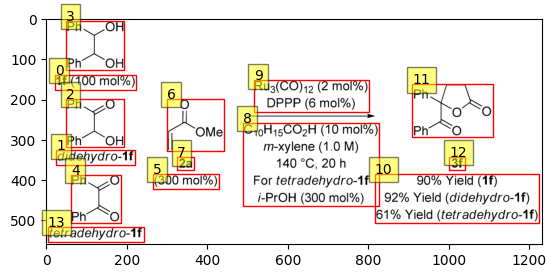

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 7], [2, 8], [1, 9]]
[[6.650000095367432, 262.6000061035156, 1345.5999755859375, 680.0400390625], [209.94000244140625, 14.899999618530273, 386.82000732421875, 180.1999969482422], [288.95001220703125, 206.64999389648438, 312.25, 236.1699981689453], [399.0299987792969, 42.41999816894531, 518.2100219726562, 101.23999786376953], [399.0299987792969, 122.30000305175781, 571.469970703125, 184.6800079345703], [624.510009765625, 10.460000038146973, 800.510009765625, 180.25], [707.9600219726562, 206.64999389648438, 733.9299926757812, 236.1699981689453], [815.3800048828125, 103.68000030517578, 949.6500244140625, 136.75], [815.3800048828125, 35.31999969482422, 915.9199829101562, 95.02000427246094], [965.4099731445312, 10.460000038146973, 1142.2900390625, 180.25], [1051.52001953125, 206.64999389648438, 1101.4599609375, 236.1699981689453]]
[4, 

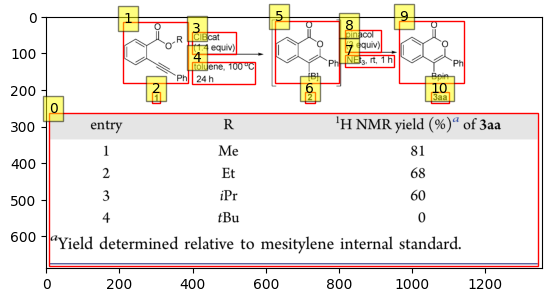

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 5], [7, 6], [0, 12], [1, 10], [2, 11]]
[[9.0, 410.0, 2792.0, 1531.0], [575.0, 157.0, 685.0, 278.0], [610.0, 349.0, 642.0, 384.0], [820.0, 137.0, 1123.0, 302.0], [959.0, 349.0, 987.0, 386.0], [1207.0, 171.0, 1382.0, 219.0], [1359.0, 256.0, 1558.0, 295.0], [1409.0, 8.0, 1702.0, 192.0], [1535.0, 190.0, 1583.0, 223.0], [1799.0, 82.0, 1975.0, 331.0], [1842.0, 345.0, 1921.0, 394.0], [2061.0, 84.0, 2239.0, 329.0], [2079.0, 344.0, 2164.0, 394.0]]
[4, 1, 3, 1, 3, 2, 2, 1, 3, 1, 3, 1, 3]
9.0 410.0
575.0 157.0
610.0 349.0
820.0 137.0
959.0 349.0
1207.0 171.0
1359.0 256.0
1409.0 8.0
1535.0 190.0
1799.0 82.0
1842.0 345.0
2061.0 84.0
2079.0 344.0


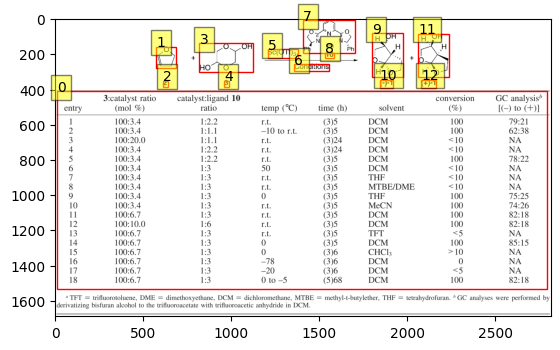

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 3], [1, 2]]
[[3.8399999141693115, 347.5400085449219, 1326.8299560546875, 811.2900390625], [63.72999954223633, 18.649999618530273, 274.83001708984375, 265.67999267578125], [162.83999633789062, 285.4599914550781, 237.79998779296875, 324.489990234375], [388.2699890136719, 140.6199951171875, 864.0, 278.75], [393.7099914550781, 39.34000015258789, 859.6400146484375, 126.28999328613281], [978.52001953125, 5.579999923706055, 1269.1199951171875, 256.9700012207031], [1103.760009765625, 286.54998779296875, 1180.9000244140625, 323.3999938964844]]
[4, 1, 3, 2, 2, 1, 3]
3.8399999141693115 347.5400085449219
63.72999954223633 18.649999618530273
162.83999633789062 285.4599914550781
388.2699890136719 140.6199951171875
393.7099914550781 39.34000015258789
978.52001953125 5.579999923706055
1103.760009765625 286.54998779296875


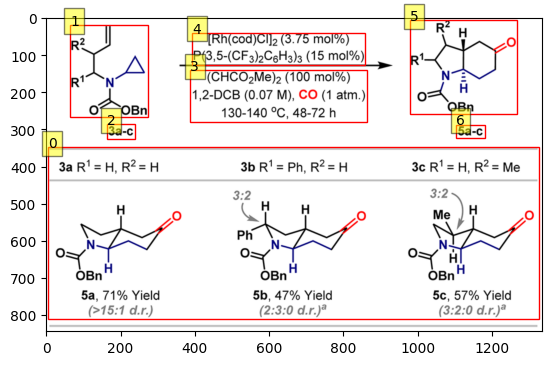

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 1], [0, 5]]
[[2.0, 11.0, 380.0, 248.0], [13.0, 360.0, 1282.0, 1223.0], [78.0, 257.0, 295.79998779296875, 317.79998779296875], [391.0, 17.0, 873.2999877929688, 89.0], [391.0, 147.0, 899.0, 214.0], [928.0, 9.0, 1314.0, 246.8000030517578], [1082.0, 255.0, 1163.0, 311.0]]
[1, 4, 3, 2, 2, 1, 3]
2.0 11.0
13.0 360.0
78.0 257.0
391.0 17.0
391.0 147.0
928.0 9.0
1082.0 255.0


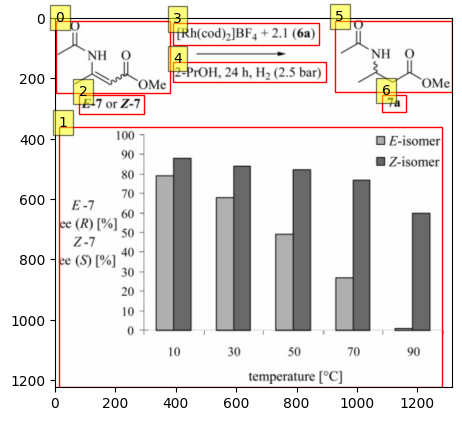

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 1]]
[[7.159999847412109, 375.1700134277344, 1342.9000244140625, 789.9000244140625], [171.85000610351562, 126.0999984741211, 214.510009765625, 159.61000061035156], [272.489990234375, 101.69999694824219, 450.3599853515625, 136.22999572753906], [471.739990234375, 6.099999904632568, 1178.199951171875, 286.70001220703125], [738.0900268554688, 275.5400085449219, 782.780029296875, 308.0400085449219]]
[4, 3, 2, 1, 3]
7.159999847412109 375.1700134277344
171.85000610351562 126.0999984741211
272.489990234375 101.69999694824219
471.739990234375 6.099999904632568
738.0900268554688 275.5400085449219


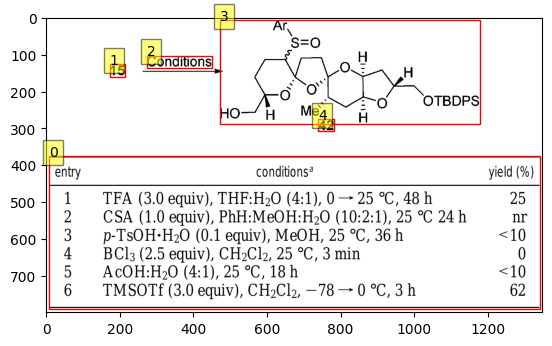

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 12], [5, 13], [6, 14], [7, 19], [8, 17], [9, 1], [10, 15], [11, 16]]
[[49.0, 0.0, 244.0, 224.0], [106.0, 262.0, 273.0, 321.0], [143.0, 210.0, 202.0, 268.0], [260.0, 1.0, 480.6000061035156, 169.6999969482422], [269.0, 496.0, 553.0, 769.0], [328.0, 209.0, 404.0, 265.0], [540.0, 17.0, 782.0, 74.5999984741211], [579.0, 97.0, 748.0, 160.39999389648438], [849.0, 291.0, 1303.0, 459.0], [870.0, 0.0, 1280.0, 225.0], [1053.0, 206.0, 1116.0, 269.0], [1064.0, 446.0, 1101.0, 491.0], [58.0, 519.0, 180.0, 691.0], [104.0, 701.0, 172.0, 758.0], [267.0, 764.0, 722.0, 1011.0], [617.0, 504.0, 902.0, 695.0], [664.0, 696.0, 728.0, 755.0], [948.0, 511.0, 1240.0, 735.0], [998.0, 696.0, 1066.0, 757.0], [0.0, 1026.0, 1344.0, 1964.0]]
[1, 2, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 4]
49.0 0.0
106.0 262.0
143.0 210.0
260.0 1.0
269.0 496.0
328.0 2

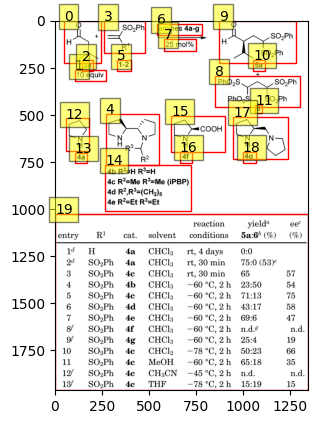

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 3], [6, 4]]
[[6.0, 253.0, 1348.0, 328.0], [118.0999984741211, 41.400001525878906, 435.8999938964844, 199.60000610351562], [263.0, 182.0, 289.0, 232.0], [496.0, 21.0, 872.0, 128.0], [550.0, 143.0, 798.0, 218.0], [905.0, 6.0, 1232.0, 191.6999969482422], [1057.0, 178.0, 1093.0, 228.0]]
[4, 1, 3, 2, 2, 1, 3]
6.0 253.0
118.0999984741211 41.400001525878906
263.0 182.0
496.0 21.0
550.0 143.0
905.0 6.0
1057.0 178.0


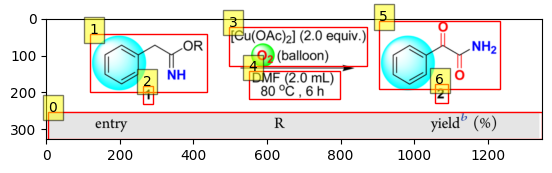

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 4], [3, 1]]
[[6.0, 347.0, 1352.0, 631.0], [150.8000030517578, 2.0, 517.0, 328.0], [154.0, 219.0, 236.0, 271.0], [575.1799926757812, 31.0, 772.1799926757812, 142.0], [575.1799926757812, 185.5500030517578, 785.1799926757812, 285.54998779296875], [852.0, 0.0, 1206.0, 251.1999969482422], [925.0, 222.0, 1007.0, 267.0]]
[4, 1, 3, 2, 2, 1, 3]
6.0 347.0
150.8000030517578 2.0
154.0 219.0
575.1799926757812 31.0
575.1799926757812 185.5500030517578
852.0 0.0
925.0 222.0


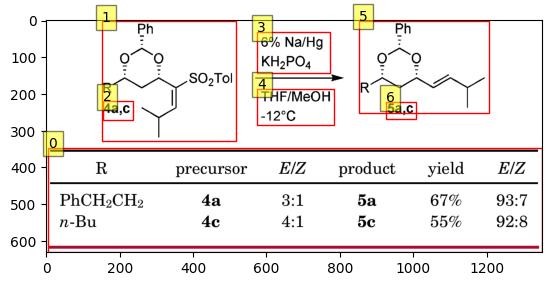

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[25, 14], [16, 13], [1, 8], [23, 7], [19, 6], [5, 11], [22, 3], [18, 17], [2, 9]]
[[3.5999999046325684, 300.6000061035156, 192.0, 363.0], [79.0, 361.0, 118.0, 402.0], [80.0, 395.20001220703125, 338.5, 557.800048828125], [101.0, 22.0, 341.5, 222.1999969482422], [130.0, 192.0, 163.0, 219.0], [220.0, 293.0, 327.0, 363.0], [391.6000061035156, 365.20001220703125, 498.0, 461.19000244140625], [404.0, 473.0, 483.0, 519.0], [538.0, 385.0, 805.0, 539.0], [549.0499877929688, 298.05999755859375, 657.469970703125, 341.42999267578125], [576.0, 21.700000762939453, 762.7000122070312, 84.0], [578.0, 181.0, 779.0, 228.0], [729.0, 79.0, 768.0, 111.0], [738.0, 231.0, 761.0, 267.0], [843.0, 373.0, 946.0, 464.0], [857.0, 481.0, 941.0, 515.0], [1022.0, 302.3900146484375, 1133.0, 376.3900146484375], [1029.18994140625, 20.399999618530273, 1310.18994140625, 2

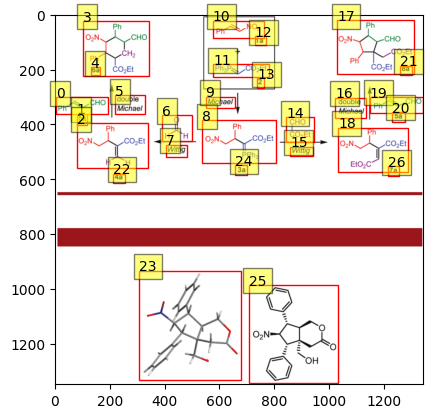

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[8, 0], [7, 4], [6, 5]]
[[0.0, 294.0, 1352.0, 1056.0], [25.799999237060547, 79.0, 234.0, 214.5], [114.0, 223.0, 156.0, 278.0], [278.0, 111.19999694824219, 544.0, 174.6999969482422], [369.0, 224.0, 438.0, 283.0], [549.0, 0.0, 897.0, 145.0], [611.0, 141.0, 823.0, 248.0], [914.9000244140625, 72.80000305175781, 1322.10009765625, 210.8000030517578], [1115.0, 224.0, 1185.0, 281.0]]
[4, 1, 3, 1, 3, 2, 2, 1, 3]
0.0 294.0
25.799999237060547 79.0
114.0 223.0
278.0 111.19999694824219
369.0 224.0
549.0 0.0
611.0 141.0
914.9000244140625 72.80000305175781
1115.0 224.0


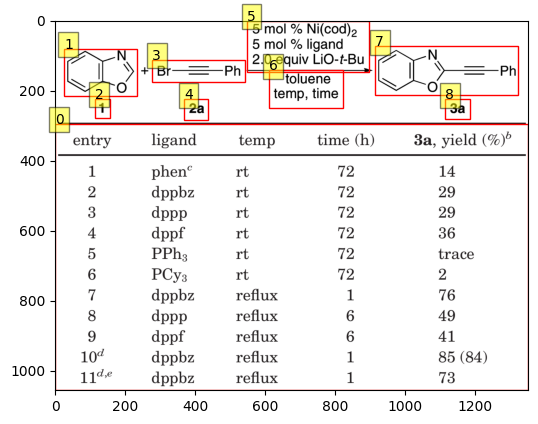

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 1], [4, 2], [7, 8]]
[[5.0, 294.0, 1348.0, 1964.0], [26.0, 54.0, 290.0, 215.0], [140.0, 239.0, 159.0, 267.0], [352.0, 50.0, 581.0, 235.0], [451.0, 238.0, 471.0, 268.0], [600.030029296875, 153.9199981689453, 1039.0, 245.13999938964844], [641.2999877929688, 96.0, 973.699951171875, 136.39999389648438], [1048.0, 4.0, 1333.0, 246.0], [1180.0, 237.0, 1200.0, 269.0]]
[4, 1, 3, 1, 3, 2, 2, 1, 3]
5.0 294.0
26.0 54.0
140.0 239.0
352.0 50.0
451.0 238.0
600.030029296875 153.9199981689453
641.2999877929688 96.0
1048.0 4.0
1180.0 237.0


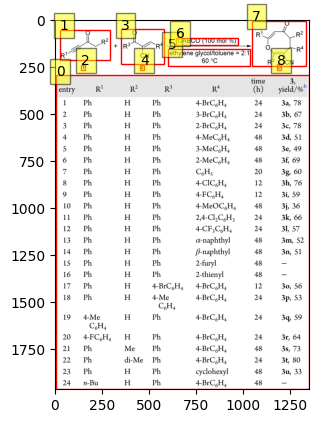

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[8, 0], [7, 5], [6, 2]]
[[6.0, 428.0, 1343.0, 877.0], [225.0, 85.4000015258789, 450.79998779296875, 253.79998779296875], [314.0, 235.0, 348.0, 283.0], [495.0, 100.0, 532.0, 144.0], [523.0, 154.0, 774.0, 207.0], [543.4000244140625, 3.0, 779.0, 130.0], [877.5, 82.0, 1132.0, 287.79998779296875], [981.0, 236.0, 1023.0, 278.0], [3.0, 867.0, 1231.0, 922.0]]
[4, 1, 3, 3, 2, 1, 1, 3, 2]
6.0 428.0
225.0 85.4000015258789
314.0 235.0
495.0 100.0
523.0 154.0
543.4000244140625 3.0
877.5 82.0
981.0 236.0
3.0 867.0


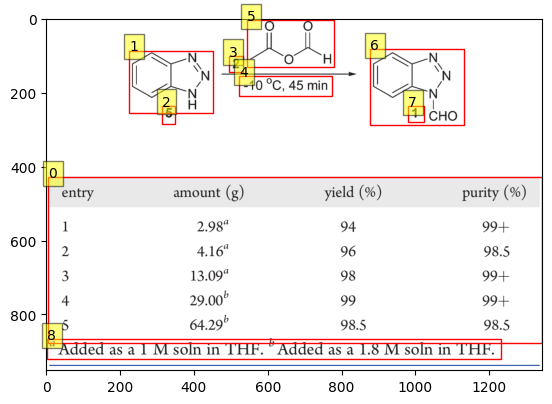

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 7], [3, 6]]
[[247.0, 1.0, 466.0, 194.0], [375.0, 272.0, 443.0, 318.0], [462.0, 224.0, 745.0, 442.0], [472.0, 8.0, 825.0, 102.0], [523.0, 126.0, 780.0, 176.0], [805.0, 227.0, 933.0, 494.0], [883.0, 0.0, 1094.0, 191.0], [583.0, 508.0, 617.0, 552.0], [853.0, 511.0, 889.0, 549.0]]
[1, 2, 1, 2, 2, 1, 1, 3, 3]
247.0 1.0
375.0 272.0
462.0 224.0
472.0 8.0
523.0 126.0
805.0 227.0
883.0 0.0
583.0 508.0
853.0 511.0


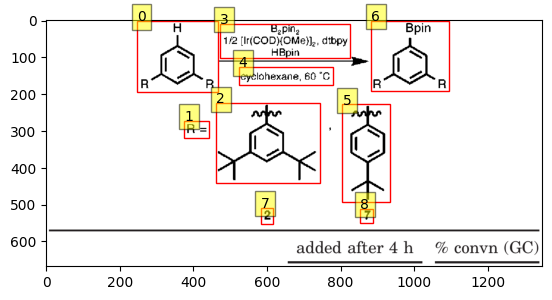

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 2], [0, 3]]
[[7.699999809265137, 23.399999618530273, 316.8000183105469, 201.39999389648438], [8.0, 373.0, 1284.0, 1228.0], [119.5, 251.1999969482422, 179.8000030517578, 321.0], [362.0, 43.5, 856.0, 108.0], [363.9100036621094, 130.5800018310547, 756.0, 194.8000030517578], [969.0, 0.0, 1276.0999755859375, 229.6999969482422], [1080.0, 296.8999938964844, 1120.699951171875, 360.0]]
[1, 4, 3, 2, 2, 1, 3]
7.699999809265137 23.399999618530273
8.0 373.0
119.5 251.1999969482422
362.0 43.5
363.9100036621094 130.5800018310547
969.0 0.0
1080.0 296.8999938964844


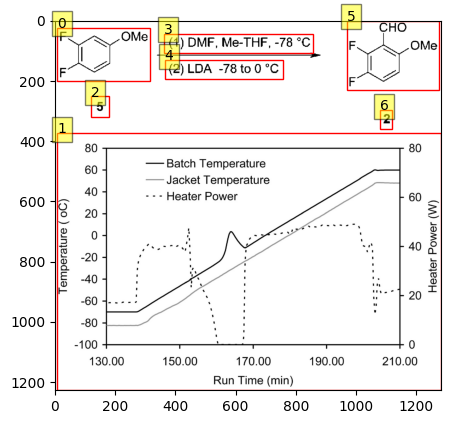

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 1], [2, 0]]
[[2.0, 41.70000076293945, 368.79998779296875, 266.6000061035156], [138.9600067138672, 305.8399963378906, 185.55999755859375, 362.3399963378906], [394.70001220703125, 169.6199951171875, 897.8300170898438, 276.989990234375], [395.0, 25.0, 834.7999877929688, 140.8000030517578], [906.4000244140625, 0.0, 1337.60009765625, 270.70001220703125], [1077.1099853515625, 307.9800109863281, 1147.9100341796875, 361.7799987792969]]
[1, 3, 2, 2, 1, 3]
2.0 41.70000076293945
138.9600067138672 305.8399963378906
394.70001220703125 169.6199951171875
395.0 25.0
906.4000244140625 0.0
1077.1099853515625 307.9800109863281


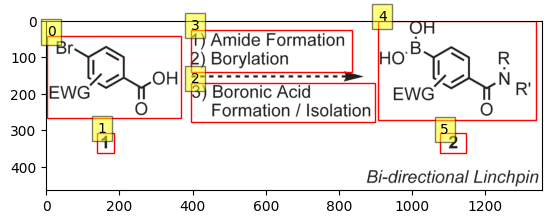

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[10, 3], [11, 1], [10, 9], [12, 2], [11, 0]]
[[1185.5, 413.20001220703125, 1384.199951171875, 594.7000122070312], [1215.0, 319.0, 1477.0, 367.0], [1423.0, 392.0, 1460.0, 419.0], [1464.0, 493.0, 1561.0, 521.0], [1571.9000244140625, 411.1000061035156, 1791.0999755859375, 594.0], [1835.0, 380.0, 1874.0, 407.0], [1946.800048828125, 410.5, 2148.10009765625, 594.5], [1973.0, 315.0, 2254.0, 369.0], [2197.0, 390.0, 2238.0, 413.0], [678.0, 695.0, 2685.0, 2056.0], [1167.0, 619.0, 1462.0, 676.0], [1570.0, 624.0, 1858.0, 678.0], [1948.0, 624.0, 2212.0, 673.0]]
[1, 3, 2, 2, 1, 2, 1, 3, 2, 4, 2, 2, 2]
1185.5 413.20001220703125
1215.0 319.0
1423.0 392.0
1464.0 493.0
1571.9000244140625 411.1000061035156
1835.0 380.0
1946.800048828125 410.5
1973.0 315.0
2197.0 390.0
678.0 695.0
1167.0 619.0
1570.0 624.0
1948.0 624.0


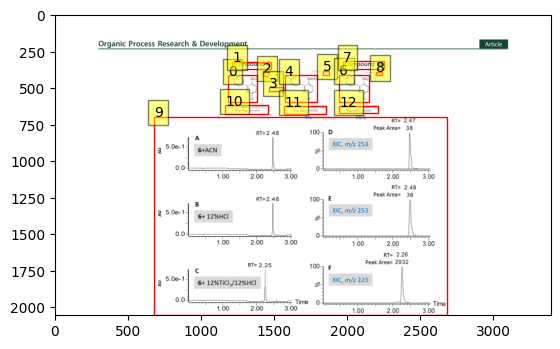

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 16], [2, 20], [19, 17], [21, 18], [23, 4], [22, 5], [25, 6], [12, 7], [24, 3], [13, 9], [14, 8], [15, 1]]
[[0.0, 0.0, 341.0, 243.0], [85.0999984741211, 246.5, 304.0, 299.0], [99.0, 415.0, 523.2999877929688, 663.0], [393.0, 172.8000030517578, 589.2999877929688, 229.0], [402.0, 93.0, 593.0, 154.0], [598.0, 14.0, 877.0, 111.19999694824219], [612.0, 135.0, 859.0, 282.29998779296875], [640.0, 406.0, 1186.300048828125, 663.0], [946.7000122070312, 0.0, 1283.0, 243.0], [1097.800048828125, 248.60000610351562, 1166.9000244140625, 296.20001220703125], [94.0, 780.7999877929688, 581.2000122070312, 1032.199951171875], [226.5, 671.7000122070312, 409.5, 735.0], [649.0, 779.7000122070312, 1133.4000244140625, 1032.199951171875], [766.0, 672.7999877929688, 965.7000122070312, 733.0], [96.80000305175781, 1148.699951171875, 530.5, 1402.2999267578125],

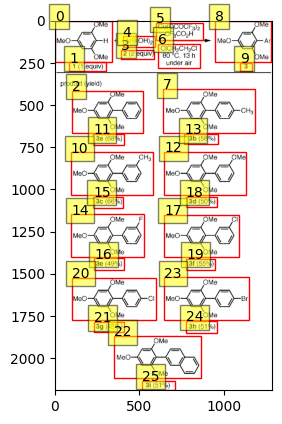

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 1], [5, 2]]
[[300.0, 306.0, 3109.0, 918.0], [1390.0, 9.0, 1528.0, 195.0], [1447.0, 238.0, 1476.0, 273.0], [1671.0, 54.0, 1722.0, 89.0], [1884.0, 18.0, 1998.0, 208.0], [1930.0, 239.0, 1954.0, 271.0]]
[4, 1, 3, 2, 1, 3]
300.0 306.0
1390.0 9.0
1447.0 238.0
1671.0 54.0
1884.0 18.0
1930.0 239.0


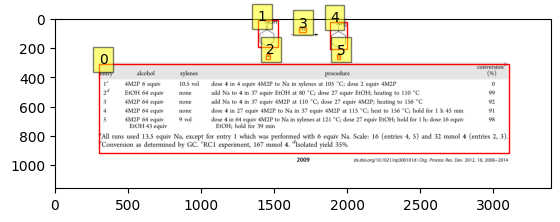

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 5], [6, 3], [0, 2]]
[[15.0, 249.0, 1196.0, 2264.0], [155.0, 39.0, 396.0, 146.0], [267.0, 147.0, 306.0, 195.0], [482.0, 44.0, 651.0, 154.0], [536.0, 146.0, 583.0, 195.0], [774.5, 0.0, 1044.9000244140625, 161.1999969482422], [891.0, 147.0, 934.0, 194.0]]
[4, 1, 3, 1, 3, 1, 3]
15.0 249.0
155.0 39.0
267.0 147.0
482.0 44.0
536.0 146.0
774.5 0.0
891.0 147.0


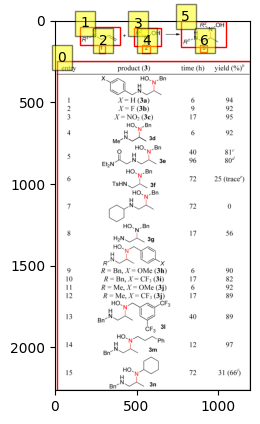

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[[7.0, 65.5999984741211, 260.0, 203.0], [94.0, 249.0, 233.0, 287.70001220703125], [98.0, 217.0, 229.0, 250.0], [327.20001220703125, 65.30000305175781, 629.0, 188.8000030517578], [397.0, 209.0, 545.5999755859375, 252.8000030517578], [528.0, 285.0, 1161.0, 347.0], [650.0, 35.0, 998.7000122070312, 124.19999694824219], [719.5, 146.1999969482422, 910.2999877929688, 270.29998779296875], [1038.0, 38.400001525878906, 1352.9000244140625, 243.20001220703125], [1217.9100341796875, 229.75, 1302.7900390625, 275.760009765625]]
[1, 2, 2, 1, 2, 2, 2, 2, 1, 2]
7.0 65.5999984741211
94.0 249.0
98.0 217.0
327.20001220703125 65.30000305175781
397.0 209.0
528.0 285.0
650.0 35.0
719.5 146.1999969482422
1038.0 38.400001525878906
1217.9100341796875 229.75


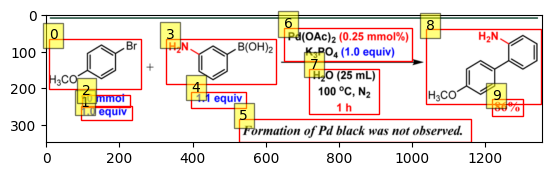

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[4, 1], [5, 2], [8, 7]]
[[9.0, 327.0, 1348.0, 472.0], [130.5, 3.0, 323.8999938964844, 191.89999389648438], [170.0, 232.0, 195.0, 270.0], [397.1000061035156, 3.0, 615.0, 194.89999389648438], [493.0, 233.0, 529.0, 275.0], [589.0, 80.0, 803.0, 133.0], [589.7000122070312, 146.0, 757.0, 197.0], [878.2999877929688, 5.0, 1222.5999755859375, 194.8000030517578], [1000.0999755859375, 231.10000610351562, 1096.0, 277.8999938964844]]
[4, 1, 3, 1, 3, 2, 2, 1, 3]
9.0 327.0
130.5 3.0
170.0 232.0
397.1000061035156 3.0
493.0 233.0
589.0 80.0
589.7000122070312 146.0
878.2999877929688 5.0
1000.0999755859375 231.10000610351562


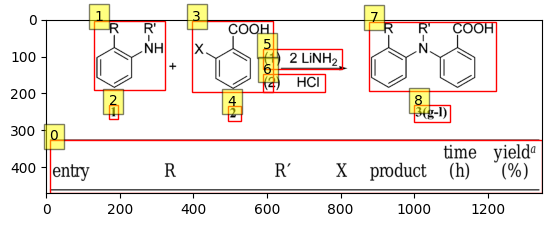

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 1], [4, 0], [2, 5]]
[[126.0, 0.0, 814.0, 341.0], [513.0, 348.0, 548.0, 396.0], [2.0, 604.0, 456.0, 960.0], [196.0, 981.0, 231.0, 1023.0], [591.0, 608.0, 948.0, 945.0], [801.0, 960.0, 837.0, 1003.0]]
[1, 3, 1, 3, 1, 3]
126.0 0.0
513.0 348.0
2.0 604.0
196.0 981.0
591.0 608.0
801.0 960.0


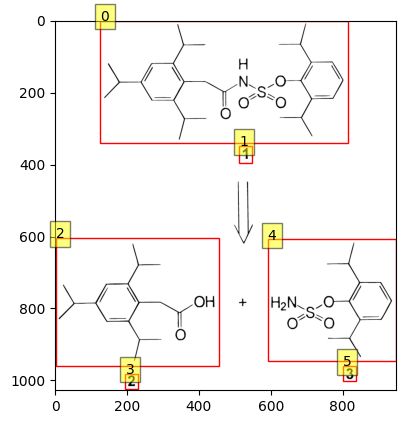

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[10, 8], [1, 4], [2, 9], [3, 0]]
[[3.0, 299.0, 1349.0, 1580.0], [3.0, 0.0, 189.0, 153.0], [26.0, 207.0, 70.0, 247.0], [206.0, 61.0, 390.0, 128.0], [294.0, 209.0, 344.0, 249.0], [409.0, 113.0, 637.0, 162.0], [449.0, 49.0, 580.0, 95.0], [675.0, 26.0, 1040.0, 195.0], [796.0, 205.0, 833.0, 247.0], [1066.0, 77.0, 1356.0, 194.0], [1239.0, 207.0, 1287.0, 249.0]]
[4, 1, 3, 1, 3, 2, 2, 1, 3, 1, 3]
3.0 299.0
3.0 0.0
26.0 207.0
206.0 61.0
294.0 209.0
409.0 113.0
449.0 49.0
675.0 26.0
796.0 205.0
1066.0 77.0
1239.0 207.0


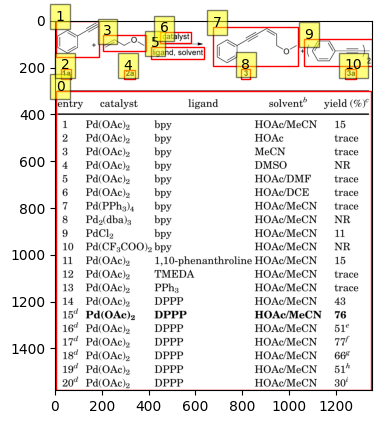

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 6], [8, 0], [3, 7]]
[[5.0, 269.0, 1346.0, 344.0], [121.0, 32.0, 335.0, 164.0], [203.0, 205.0, 239.0, 236.0], [445.0, 204.0, 481.0, 236.0], [452.0, 38.0, 492.0, 189.0], [543.0, 74.0, 938.0, 112.0], [598.0, 133.0, 855.0, 170.0], [977.0, 4.0, 1228.0, 242.0], [1029.0, 204.0, 1065.0, 235.0]]
[4, 1, 3, 3, 1, 2, 2, 1, 3]
5.0 269.0
121.0 32.0
203.0 205.0
445.0 204.0
452.0 38.0
543.0 74.0
598.0 133.0
977.0 4.0
1029.0 204.0


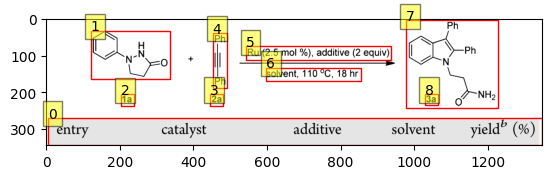

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[8, 5], [7, 1]]
[[143.0, 39.0, 384.0, 188.8000030517578], [152.0, 383.0, 1476.0, 2320.0], [401.0, 16.0, 666.0, 101.0], [401.8999938964844, 130.3000030517578, 520.2000122070312, 227.22000122070312], [417.94000244140625, 241.8800048828125, 661.9400024414062, 291.8800048828125], [516.5999755859375, 128.8000030517578, 669.199951171875, 244.0], [706.9000244140625, 6.0, 941.0, 208.39999389648438], [727.0, 272.0, 928.0, 315.0], [781.0, 237.0, 883.0, 273.0], [946.9000244140625, 134.0, 1216.0, 219.0], [947.0, 16.0, 1220.0, 108.0], [1229.0, 31.0, 1458.0, 229.89999389648438], [1273.0, 235.0, 1379.0, 280.0], [125.0, 2313.0, 1476.0, 3655.0]]
[1, 4, 2, 2, 2, 1, 1, 2, 3, 2, 2, 1, 3, 2]
143.0 39.0
152.0 383.0
401.0 16.0
401.8999938964844 130.3000030517578
417.94000244140625 241.8800048828125
516.5999755859375 128.8000030517578
706.9000244140625 6.0


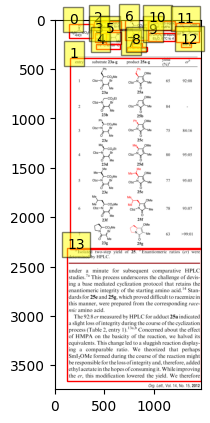

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 7], [4, 5]]
[[3.0, 2.0, 411.0, 221.0], [7.0, 364.0, 1346.0, 664.0], [140.0, 235.0, 202.0, 291.0], [423.0, 12.0, 695.0, 132.0], [492.0, 188.10000610351562, 624.0, 244.91000366210938], [736.5, 3.0999999046325684, 1221.699951171875, 222.90000915527344], [935.0700073242188, 236.07000732421875, 996.77001953125, 294.9700012207031], [1317.0999755859375, 80.0, 1354.0, 140.89999389648438]]
[1, 4, 3, 2, 2, 1, 3, 3]
3.0 2.0
7.0 364.0
140.0 235.0
423.0 12.0
492.0 188.10000610351562
736.5 3.0999999046325684
935.0700073242188 236.07000732421875
1317.0999755859375 80.0


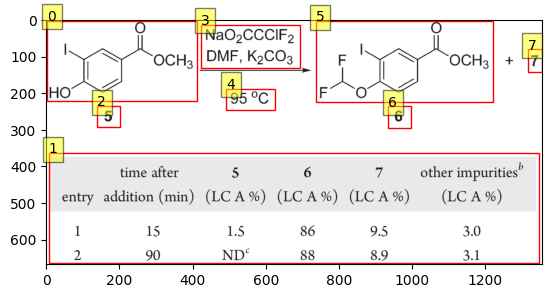

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 7], [2, 1], [5, 8]]
[[3.7300000190734863, 292.57000732421875, 1349.7099609375, 2493.820068359375], [144.5399932861328, 42.68000030517578, 223.76998901367188, 168.54000854492188], [160.57000732421875, 178.92999267578125, 211.3800048828125, 220.26998901367188], [355.8299865722656, 37.58000183105469, 479.5099792480469, 191.1300048828125], [403.9200134277344, 209.52999877929688, 454.010009765625, 249.4199981689453], [551.8300170898438, 4.070000171661377, 810.2900390625, 99.33000183105469], [554.010009765625, 135.94000244140625, 808.1099853515625, 267.6300048828125], [890.6199951171875, 18.639999389648438, 1208.8299560546875, 223.9199981689453], [980.239990234375, 197.8699951171875, 1032.510009765625, 239.22000122070312]]
[4, 1, 3, 1, 3, 2, 2, 1, 3]
3.7300000190734863 292.57000732421875
144.5399932861328 42.68000030517578
160.57000732

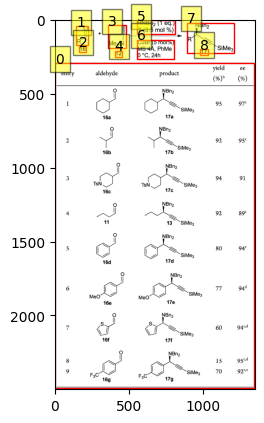

dict_keys(['bboxes', 'corefs', 'file_name', 'height', 'id', 'license', 'reactions', 'width', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[[7.159999847412109, 205.8000030517578, 1343.9000244140625, 613.4000244140625], [15.289999961853027, 47.209999084472656, 108.79000091552734, 140.70999145507812], [148.4600067138672, 42.130001068115234, 312.1000061035156, 139.69000244140625], [337.54998779296875, 36.029998779296875, 1091.830078125, 76.66000366210938], [438.19000244140625, 113.29000091552734, 991.1900024414062, 152.89999389648438], [1105.0799560546875, 5.53000020980835, 1333.7799072265625, 174.25]]
[4, 1, 1, 2, 2, 1]
7.159999847412109 205.8000030517578
15.289999961853027 47.209999084472656
148.4600067138672 42.130001068115234
337.54998779296875 36.029998779296875
438.19000244140625 113.29000091552734
1105.0799560546875 5.53000020980835


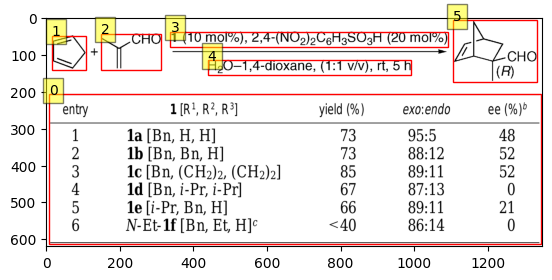

In [9]:
def split_heuristic(toprocess):
    maxy = 0 
    for pair in toprocess:
        if pair[0][1]>maxy:
            maxy = pair[0][1]
    numbuckets = int(maxy//500 + 1)

    buckets = {}
    for i in range(numbuckets):
        buckets[i] = []

    for pair in toprocess:
        buckets[int(pair[0][1]//500)].append(pair)

    for bucket in buckets:
        buckets[bucket] = sorted(buckets[bucket], key = lambda x: x[0][0])
    toreturn = []

    for bucket in buckets:
        toreturn+=buckets[bucket]

    return toreturn

for i in range(30):
    image1, target1 = train_dataset.load_and_prepare(i)
    plt.figure()
    plt.imshow(image1)
    print(target1.keys())
    print(target1['corefs'])
    data = target1['boxes']
    labels = target1['labels']
    toprocess = list(zip(data.tolist(), labels.tolist()))

    toprocess = split_heuristic(toprocess)
    boxes = [item[0] for item in toprocess]
    labels = [item[1] for item in toprocess]
    print(boxes)
    print(labels)
    ax = plt.gca()
    for i, bbox in enumerate(boxes):
        xmin, ymin, xmax, ymax = bbox #* np.array([w, h, w, h])
        print(xmin, ymin)
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='r', linewidth=1))
        ax.text(xmin, ymin, str(i), fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
    plt.show()
    
    

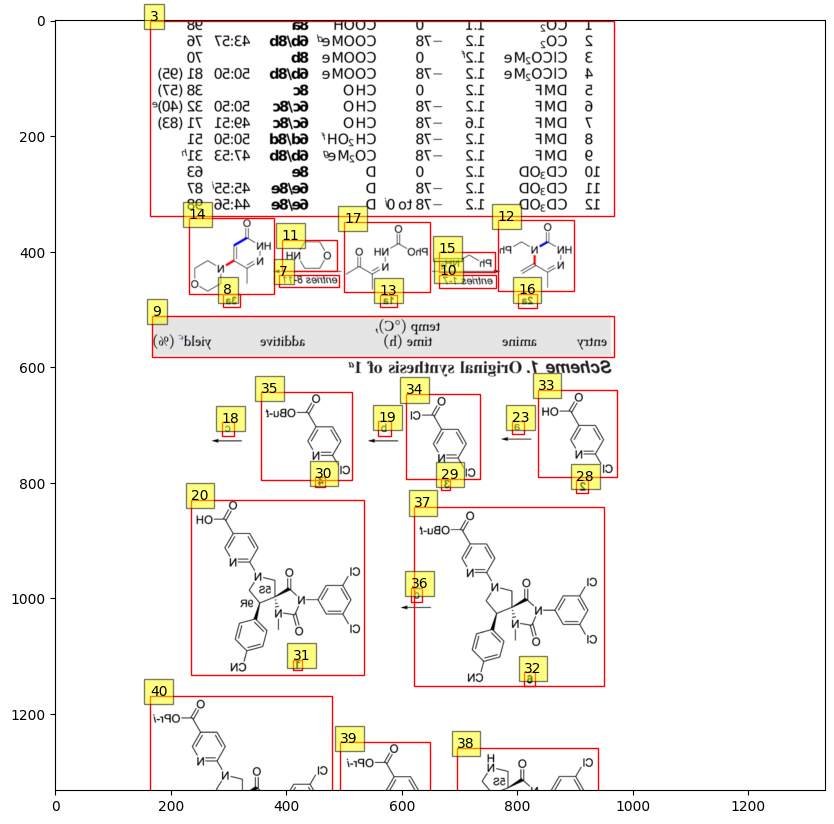

[{'conditions': [], 'products': [6, 5], 'reactants': [1]}, {'conditions': [15, 10], 'products': [12], 'reactants': [17]}, {'conditions': [11, 7], 'products': [14], 'reactants': [17]}, {'conditions': [23], 'products': [34], 'reactants': [33]}, {'conditions': [19], 'products': [35], 'reactants': [34]}, {'conditions': [18], 'products': [37], 'reactants': [35]}, {'conditions': [36], 'products': [20], 'reactants': [37]}]


In [8]:
image1, target1 = train_dataset.load_and_prepare(1)
image2, target2 = train_dataset.load_and_prepare(2)
image, target = train_dataset.concat(image1, target1, image2, target2)
image3, target3 = train_dataset.load_and_prepare(3)
image, target = train_dataset.concat(image, target, image3, target3)
image, target = train_dataset.transform(image, target)

_, h, w = image.size()
# print(image.size())
plt.figure(figsize=(10, 10))
plt.imshow(F.to_pil_image(image))
ax = plt.gca()
for i, bbox in enumerate(target['boxes']):
    if target['area'][i] == 0:
        continue
    xmin, ymin, xmax, ymax = bbox * np.array([w, h, w, h])
    ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='r', linewidth=1))
    ax.text(xmin, ymin, str(i), fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()
# print(target)
print(target['reactions'])

In [9]:
print(target['bbox'])

KeyError: 'bbox'